
# Project: Investigating how parameters influence the popularity of movies released between 2010 and 2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [114]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
pd.set_option("display.max_columns", None)

## Project Description

**Scope**: The focus of this analysis is to determine what factors will most heavily influence the popularity score  and "vote average" of a movie. The popularity score for this dataset will be assumed to mean an arbitrary score given to a movie after it was released to measure how well it was received. This factor is likely different than the "vote average" which is likely a more professionally graded movie score. The "vote average" will be referred to as IMDB score from this point forward

**Consideration**: Some important considerations I am making for my analysis includes:
> 1. I will only be analyzing the movies released between 2010 to 2015. This is due to the fact that I am assuming the popularity score of a movie may be considered differently in the 1900s vs. 2010. Secondly, it will be difficult to gauge production budget in older movies without taking into account inflation

> 2. For movies with multiple genres and production companies, I will only be using the first listed genre/production company as reference

> 3. Although the cast is an important variable in determining the popularity of a movie, I will assume this factor to likely be tied with a movie's budget. Instead, I will only be keeping the lead actor/actress.

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [115]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [116]:
df.shape

(10866, 21)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [118]:
sum(df.duplicated())

1

In [119]:
for index, name in enumerate(df.columns):
    print(index, name)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


### Data Cleaning

**Items to clean for this data set includes:**

>1. Removing some of the unecessary columns which may not contribtute to our investigation, this may include the following list = ['id', 'imbd_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote count', 'budget_adj', 'revenue_adj']
    
>2. several important columns contain missing information, for the numeric columns, this will be filled using the mean (although perhaps better methods exist as mentioned by the instructor), for string columns, missing data will be dropped
    
>3. duplicated rows will be dropped

>4. dropping movies released prior to 2010

>5. only perserving the first listed genre/cast member/production company

In [120]:
# Dropping the unecessary columns

df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [121]:
# removing movies made prior to 2010

pre2010 = df.query('release_year < 2010').index
df.drop(pre2010, inplace=True)
df['release_year'].min() == 2010

True

In [122]:
# dropping duplicate rows:

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3605 entries, 0 to 6080
Data columns (total 10 columns):
popularity              3605 non-null float64
budget                  3605 non-null int64
revenue                 3605 non-null int64
cast                    3561 non-null object
director                3579 non-null object
runtime                 3605 non-null int64
genres                  3593 non-null object
production_companies    3165 non-null object
vote_average            3605 non-null float64
release_year            3605 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 309.8+ KB


In [124]:
# since all columns containing missing information are from columns with string values,
#I will just be dropping all the null values

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 6080
Data columns (total 10 columns):
popularity              3134 non-null float64
budget                  3134 non-null int64
revenue                 3134 non-null int64
cast                    3134 non-null object
director                3134 non-null object
runtime                 3134 non-null int64
genres                  3134 non-null object
production_companies    3134 non-null object
vote_average            3134 non-null float64
release_year            3134 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 269.3+ KB


In [125]:
# lastly, I will only be keeping the first item for the columns of cast, 
# genre and production_company

split_col = ['cast', 'genres', 'production_companies']

for i in split_col:
    df[i] = df[i].apply(lambda x: x.split('|')[0])
df.head()

,popularity,budget,revenue,cast,director,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,6.5,2015
1,28.419936,150000000,378436354,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,7.1,2015
2,13.112507,110000000,295238201,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,6.3,2015
3,11.173104,200000000,2068178225,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,7.5,2015
4,9.335014,190000000,1506249360,Vin Diesel,James Wan,137,Action,Universal Pictures,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

In this section, I will be analyzing and comparing a film's popularity rating vs. its IMBD score, as well as some other interesting parameters based on three key areas:

>1. Production budget

>2. Cast, genre, production company

>3. Revenue

### Some general explorations

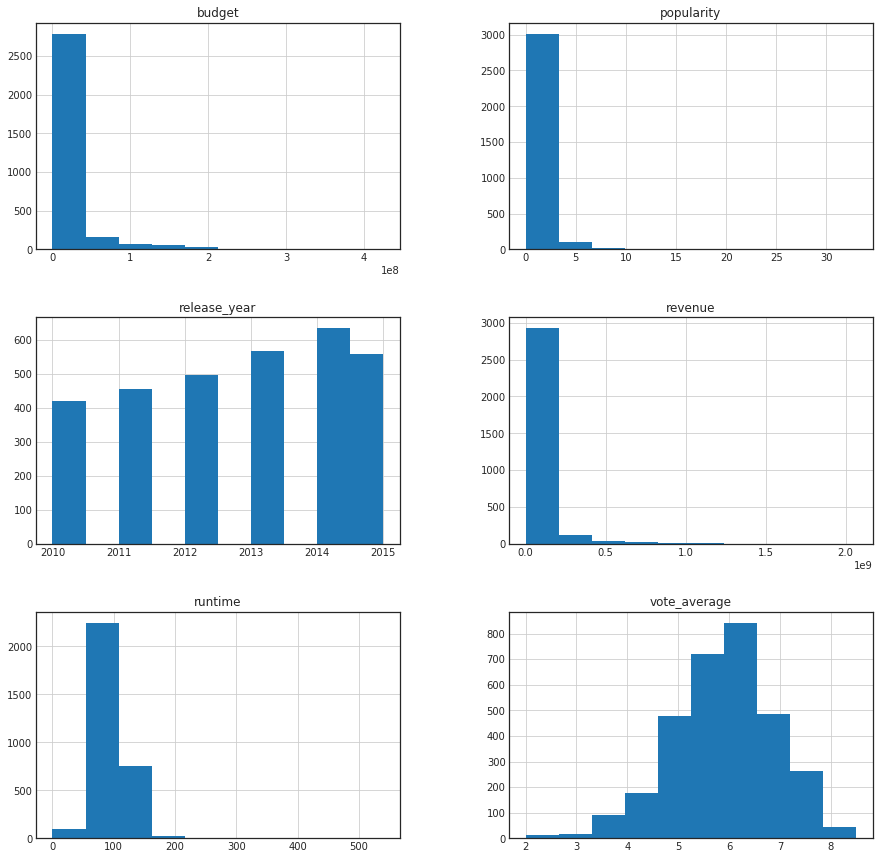

In [126]:
df.hist(figsize=(15,15));

For generalization purposes, I will create a mask containing datasets with above average popularity and below average popularity

In [127]:
higher_scores = df[df['popularity'] > df['popularity'].mean()]
lower_scores = df[df['popularity'] < df['popularity'].mean()]
print('The average popularity score is {}'.format(df.popularity.mean()) + 'out of a total of {} films'.format(df.shape[0]))
print('The average popularity score of above average films is {}'.format(higher_scores['popularity'].mean()) + 'out of a total of {} films'.format(higher_scores.shape[0]))
print('The average popularity score of below average films is {}'.format(lower_scores['popularity'].mean()) + 'out of a total of {} films'.format(lower_scores.shape[0]))

The average popularity score is 0.8382605717932354out of a total of 3134 films
The average popularity score of above average films is 2.1793276374407577out of a total of 844 films
The average popularity score of below average films is 0.34399829956331873out of a total of 2290 films


**Analysis:** Based on these scores, there seems to be more bad movies than there are good

I think it is generally common practice to checkout a movie's IMDB rating prior to watching the movie, therefore I think there should be a positive relationship between IMDB scores and popularity ratings. Let's see if this is the case:

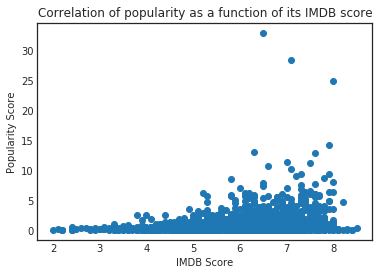

In [128]:
sns.set_style("white")
plt.scatter(x=df['vote_average'], y=df['popularity'])
plt.title('Correlation of popularity as a function of its IMDB score')
plt.xlabel('IMDB Score')
plt.ylabel('Popularity Score');

**Analysis:** Based on this plot, there seems to be a slight positive correlation between popularity scores and IMDB scores

## Analysis of Revenue

Next, lets analyze whether or not higher production budgets will lead to a higher IMDB score

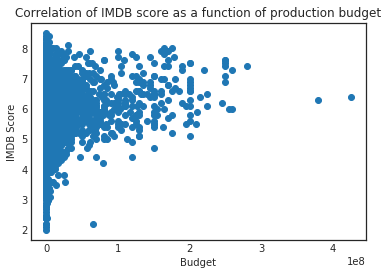

In [129]:
sns.set_style("white")
plt.scatter(x=df['budget'], y=df['vote_average'])
plt.title('Correlation of IMDB score as a function of production budget')
plt.xlabel('Budget')
plt.ylabel('IMDB Score');

**Analysis:** There does not seems to be a particularly strong correlations between production budget and IMDB scores as many low budget films are observed to receive very high scores, while some of the higher budget films have scores just around the average score of 6

Lastly, lets analyze a movie's popularity with production budget to compare scoring between the two scores

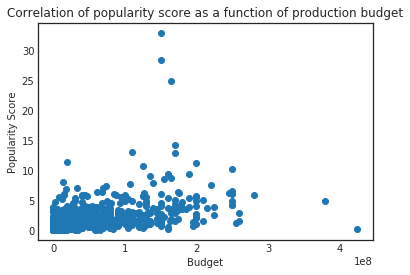

In [130]:
sns.set_style("white")
plt.scatter(x=df['budget'], y=df['popularity'])
plt.title('Correlation of popularity score as a function of production budget')
plt.xlabel('Budget')
plt.ylabel('Popularity Score');

**Analysis:** Similar tp IMDB scores, I would also consider this to be a rather weak correlation between budget and popularity. 

Now let's compare the average budget for each film genre

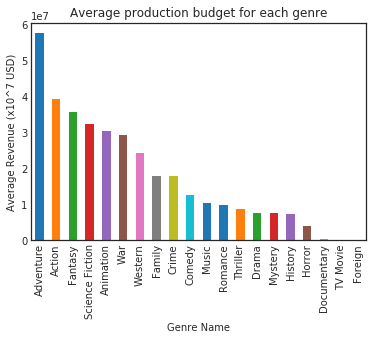

In [131]:
top10_popular_genres = df.groupby('genres')['budget'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average production budget for each genre')
plt.xlabel('Genre Name')
plt.ylabel('Average Revenue (x10^7 USD)');

**Section summary:**
>1. there seems to be a positive correlation between a film's IMDB score and its popularity score

>2. The production budget does not seem to be a strong influencing factor for a higher or lower popularity rating or IMDB score

>3. On average, advanture, action and fantasy films have the highest production budget

### Analysis of cast, genre and production company

Next, let's analyze the influence of cast, genre, and production company on a film's popularity

We'll start by comparing actors/actress with the highest "popular films" and compare them with the actors/actresses of "high IMDB score" films

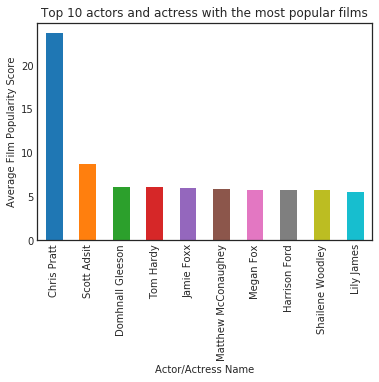

In [132]:
top10_names = df.groupby('cast')['popularity'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 actors and actress with the most popular films')
plt.xlabel('Actor/Actress Name')
plt.ylabel('Average Film Popularity Score');

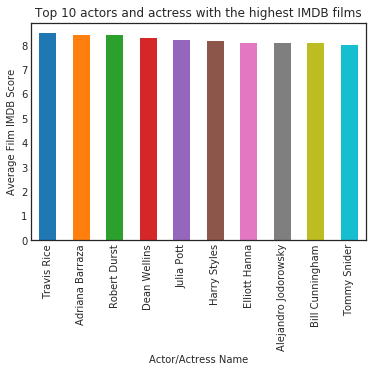

In [133]:
top10_imdb_names = df.groupby('cast')['vote_average'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 actors and actress with the highest IMDB films')
plt.xlabel('Actor/Actress Name')
plt.ylabel('Average Film IMDB Score');

**Analysis:** We can see from these two graphs, that the more "popular" films have a more "big name cast" vs the "high IMDB" films, which seem to have more lesser known cast. Also there is a direct positive correlation between the cast and popularity/IMDB ratings

Let's do the same analysis for film genres:

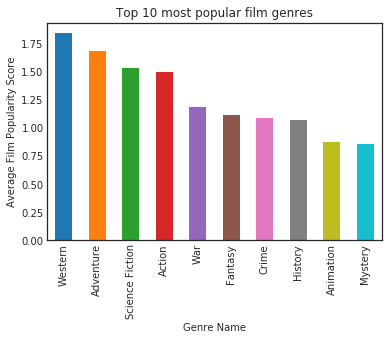

In [134]:
top10_popular_genres = df.groupby('genres')['popularity'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 most popular film genres')
plt.xlabel('Genre Name')
plt.ylabel('Average Film Popularity Score');

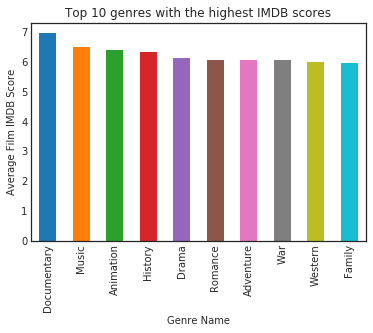

In [135]:
top10_IMDB_genres = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 genres with the highest IMDB scores')
plt.xlabel('Genre Name')
plt.ylabel('Average Film IMDB Score');

**Analysis:** Theres a big difference between genres that are most popular vs. those that are highly rated

Lastly we'll compare the production companies:

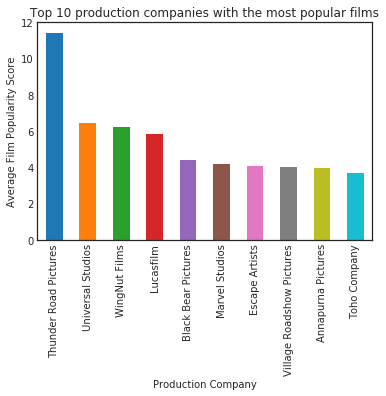

In [136]:
top10_companies = df.groupby('production_companies')['popularity'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 production companies with the most popular films')
plt.xlabel('Production Company')
plt.ylabel('Average Film Popularity Score');

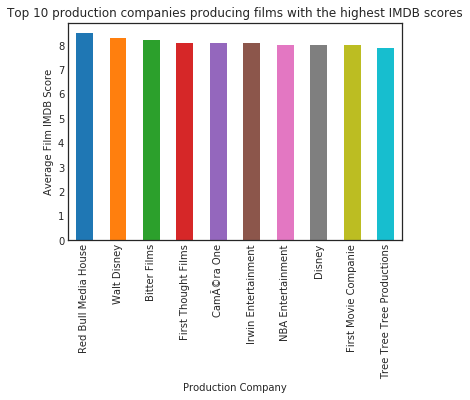

In [137]:
top10_imdb_companies = df.groupby('production_companies')['vote_average'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 production companies producing films with the highest IMDB scores')
plt.xlabel('Production Company')
plt.ylabel('Average Film IMDB Score');

**Analysis:** Once again, there is a different mix between companies that produce "popular" films vs. companies that produce "highly rated" films

**Section Summary:**

There is a large difference in cast, genre, and production company between films that that are highly popular vs. highly rated

### Analysis of Revenue

In this section, we'll analyze which films make the most revenue

We'll start by analyzing the relationship between revenue and the two scoring criterias of popularity and IMDB score:

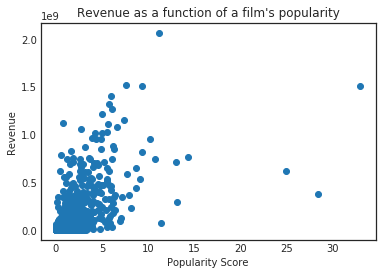

In [138]:
sns.set_style("white")
plt.scatter(x=df['popularity'], y=df['revenue'])
plt.title("Revenue as a function of a film's popularity")
plt.xlabel('Popularity Score')
plt.ylabel('Revenue');

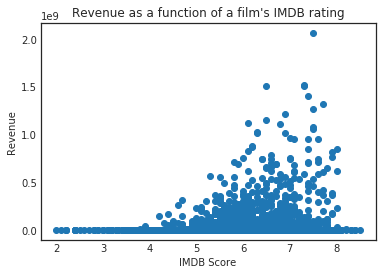

In [139]:
sns.set_style("white")
plt.scatter(x=df['vote_average'], y=df['revenue'])
plt.title("Revenue as a function of a film's IMDB rating")
plt.xlabel('IMDB Score')
plt.ylabel('Revenue');

**Analysis:** It seems that both popular films and higher rated films make more money than its corresponding counterpart

Lastly, let's see which genre makes the most and least money

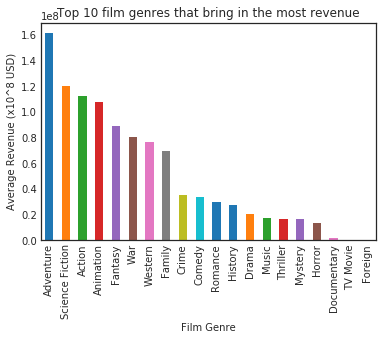

In [140]:
top10_imdb_companies = df.groupby('genres')['revenue'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 film genres that bring in the most revenue')
plt.xlabel('Film Genre')
plt.ylabel('Average Revenue (x10^8 USD)');

**Analysis:** Comparing previously reported budget data with revenue, it seems that in general films with higher budget tend to make more money

<a id='conclusions'></a>
## Conclusions

Before stating my conclusions, I should first mention some limitations:
>1. Conclusions are for the most part qulitatively, and based on the generated graphs. No complex statistical analysis were performed

>2. There were no missing numerical values post data cleaning, however, several rows with missing string values were dropped, resulting in less data to play with

Now onto my conclusions:
>1. Movies with higher IMDB scores are generally more popular

>2. A film's production budget doesn't seem to have a direct influence on neither popularity or IMDB, however indirectly, one can argue that with a higher budget, one has more choices to cast selection, which **does** positively correlate with a films popularity and IMDB rating

>3. There scoring criteria for "popular" films and "high IMDB" films are very different, as there is a completely different set of cast and production companies for the most popular films vs. the more highly rated films

>4. Films with higher popularity scores and films with higher IMDB scores tend to bring in more revenue

>5. Film's with higher production budget tend to make more revenue and vice versa

>6. Documentary films have one of the lowest production budgets and revenue, but have on average the highest IMDB rating

>7. Chris Pratt is the most popular actor for films made between 2010-2015, with a large margin over the second most popular actor

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [141]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0